<div class="alert alert-block alert-success">
<h1>Temporal and Spatial Alignment</h1></div>

**Student:** Kirsten Schulze <br>
**Email:** <kirsten.schulze@studium.uni-hamburg.de> <br>

**MSc Thesis in Ocean and Climate Physics** <br>
**Title:** Evaluation of Snow Depth Retrievals from Differences in ICESat-2 and CryoSat-2 Freeboards Using In-Situ Measurements in the Weddell Sea  <br>
**Supervisors:** Prof. Dr. Stefanie Arndt and Dr. Stefan Kern <br>
**Hamburg University** <br>


<div class="alert alert-info" role="alert">

## <a id="TOC_TOP"></a>Contents

</div>


     
1. [Sea Ice Sectors](#section1)
1. [Snow Depth Derived from Snow Buoys](#section2)
	1. [Load Data from 27 Drifting Buoys](#section2.1)
    1. [Snow Depth from April to November](#section2.2)
    1. [Availability of Snow Buoy in the years 2019, 2020, 2021 and 2022](#section2.3)
    1. [Convert Lon and Lat to EPSG:3412](#section2.4)
1. [Snow Depth from Daily KaKo20 Product](#section3)
	1. [Load Grid File](#section3.1)
	1. [Year 2019](#section3.2)
	1. [Year 2021](#section3.3)
	1. [Year 2022](#section3.4)
1. [Temporal and Spatial Alignment](#section4)
	1. [Function for the Extraction of X and Y Where In-situ Data is Available](#section4.1)
    1. [Matches for the Year 2019](#section4.2)
    1. [Matches for the Year 2021](#section4.3)
    1. [Matches for the Year 2022](#section4.4)
    1. [Include Longitude, Latitude, and Timestamp in Matches and Export Matches to Text Files](#section4.5)
    1. [Map of All Matches](#section4.6)

<hr>

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import cartopy as cp
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import seaborn as sns

from matplotlib.animation import FuncAnimation, PillowWriter
from pyproj import Transformer

<div class="alert alert-info" role="alert">

## <a id="section1"></a>Sea Ice Sectors
[Back to top](#TOC_TOP)

</div>

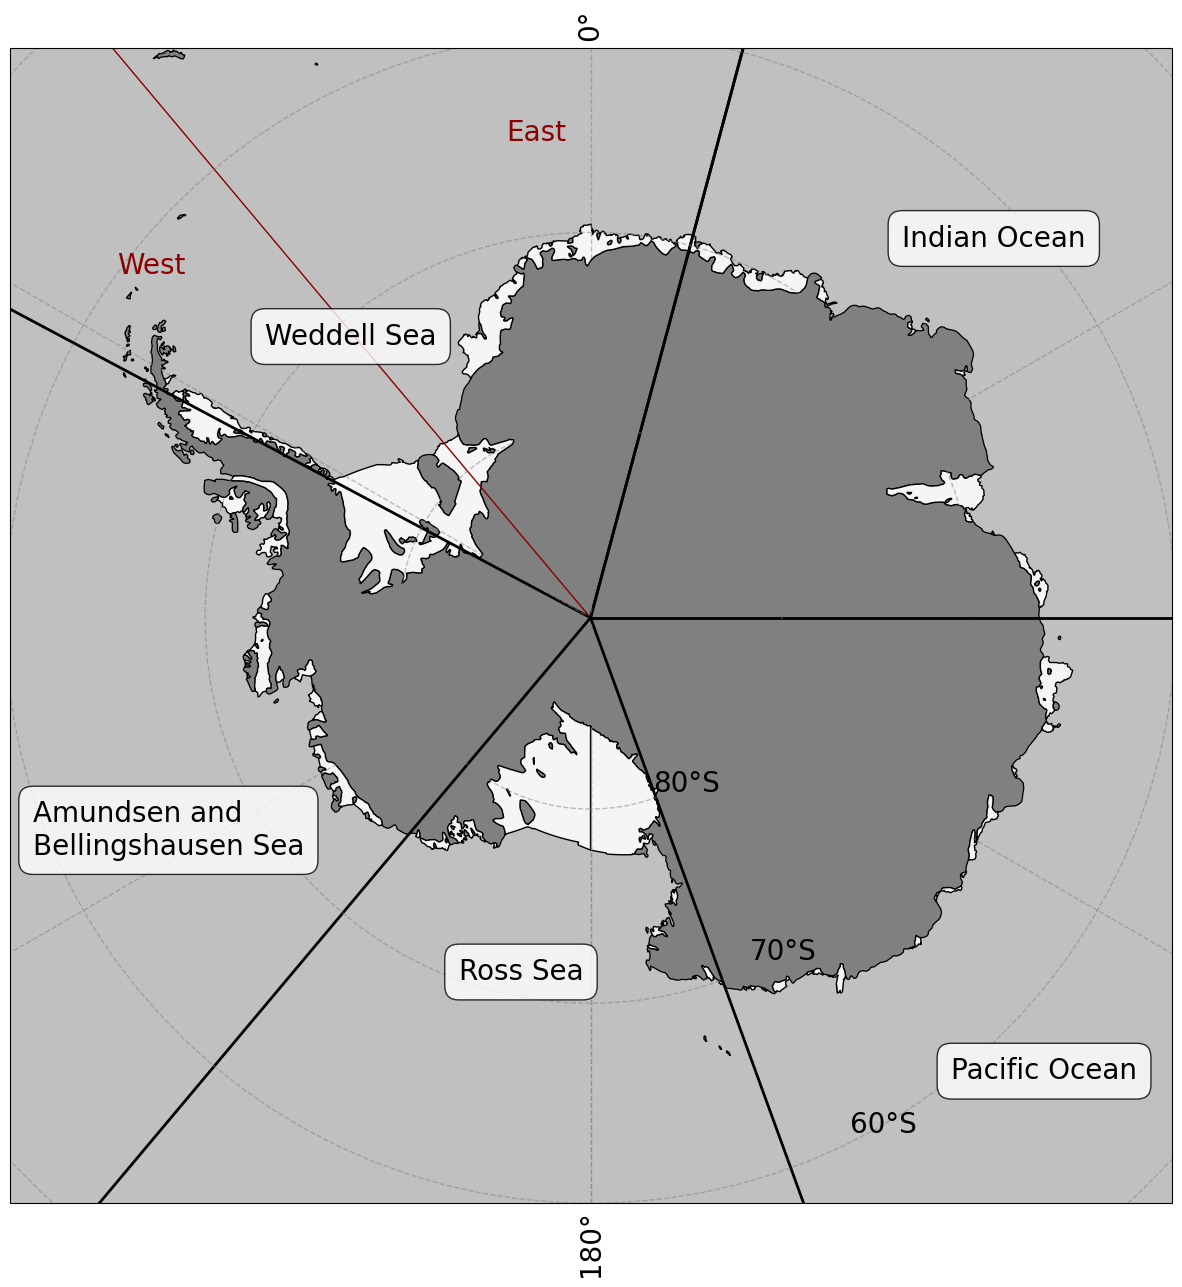

In [2]:
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw={"projection": ccrs.SouthPolarStereo()})

# Set the extent for entire Antarctic region
ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())

# Add land and ocean features
ax.add_feature(cfeature.LAND.with_scale("50m"), facecolor="grey")
ax.add_feature(cfeature.OCEAN, facecolor="silver")
ax.coastlines()

# Add ice shelves 
Ice_shelves = cfeature.NaturalEarthFeature(
    category="physical",
    name="antarctic_ice_shelves_polys",
    scale="50m"
)
ax.add_feature(Ice_shelves, facecolor="whitesmoke", edgecolor="black")

# Add gridlines with longitude and latitude labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="gray", alpha=0.5, linestyle="--")
gl.xlabel_style = {"size": 20}
gl.ylabel_style = {"size": 20}


longitude = -62  # 62°W is -62 
ax.plot([longitude, longitude], [-90, -40], transform=ccrs.PlateCarree(), color="black", linewidth=2, linestyle="-")

longitude = -40  
ax.plot([longitude, longitude], [-90, -40], transform=ccrs.PlateCarree(), color="darkred", linewidth=1, linestyle="-")

longitude = -140  
ax.plot([longitude, longitude], [-90, -40], transform=ccrs.PlateCarree(), color="black", linewidth=2, linestyle="-")


longitude = 15
ax.plot([longitude, longitude], [-90, -40], transform=ccrs.PlateCarree(), color="black", linewidth=2, linestyle="-")


longitude = 160
ax.plot([longitude, longitude], [-90, -40], transform=ccrs.PlateCarree(), color="black", linewidth=2, linestyle="-")


longitude = 90
ax.plot([longitude, longitude], [-90, -40], transform=ccrs.PlateCarree(), color="black", linewidth=2, linestyle="-")


longitude = 15
ax.plot([longitude, longitude], [-90, -40], transform=ccrs.PlateCarree(), color="black", linewidth=2, linestyle="-")



# Add labels
ax.text(-50, -68, "Weddell Sea", transform=ccrs.PlateCarree(),
        fontsize=20, color="black", bbox=dict(facecolor="white", alpha=0.8, boxstyle="round,pad=0.5"))

ax.text(-54, -60, "West", transform=ccrs.PlateCarree(),
        fontsize=20, color="darkred", bbox=dict(facecolor="white", alpha=0, boxstyle="round,pad=0.5"))

ax.text(-10, -65, "East", transform=ccrs.PlateCarree(),
        fontsize=20, color="darkred", bbox=dict(facecolor="white", alpha=0, boxstyle="round,pad=0.5"))

ax.text(40, -65, "Indian Ocean", transform=ccrs.PlateCarree(),
        fontsize=20, color="black", bbox=dict(facecolor="white", alpha=0.8, boxstyle="round,pad=0.5"))

ax.text(142, -60, "Pacific Ocean", transform=ccrs.PlateCarree(),
        fontsize=20, color="black", bbox=dict(facecolor="white", alpha=0.8, boxstyle="round,pad=0.5"))

ax.text(-160, -70, "Ross Sea", transform=ccrs.PlateCarree(),
        fontsize=20, color="black", bbox=dict(facecolor="white", alpha=0.8, boxstyle="round,pad=0.5"))

ax.text(-113, -59, "Amundsen and\nBellingshausen Sea", transform=ccrs.PlateCarree(),
        fontsize=20, color="black", bbox=dict(facecolor="white", alpha=0.8, boxstyle="round,pad=0.5"))


plt.savefig("Antarctica_with_regions02.png", bbox_inches="tight", dpi=300)
plt.show()


<div class="alert alert-info" role="alert">

## <a id="section2"></a>Snow Depth Derived from Snow Buoys
[Back to top](#TOC_TOP)

</div>

<div class="alert alert-danger" role="alert" >
    

### <a id="section2.1"></a>Load Data from 27 Drifting Buoys
[Back to top](#TOC_TOP)

</div>

In [3]:
file = "ds_buoys_27.csv"
ds = pd.read_csv(file, sep=None, engine="python") 

#Convert timestamp to datetime64[ns]
ds["timestamp"] = pd.to_datetime(ds["timestamp"], errors="coerce")

ds

,Year,Month,Day,Datenum,Latitude,Longitude,Mean snow accu,Mean snow ice,Mean snow depth,Mean sea ice thickness,Sensor Number,timestamp
0,2013,6,25,735410,-67.5638,0.2128,27.857,0.0,27.857,NaN,S6,2013-06-25
1,2013,6,26,735411,-67.7944,0.4910,29.172,0.0,29.172,NaN,S6,2013-06-26
2,2013,6,27,735412,-67.9626,0.6800,33.463,0.0,33.463,NaN,S6,2013-06-27
3,2013,6,28,735413,-68.0446,-1.4778,36.559,0.0,36.559,NaN,S6,2013-06-28
4,2013,6,29,735414,-68.0078,-2.2416,29.353,0.0,29.353,NaN,S6,2013-06-29
...,...,...,...,...,...,...,...,...,...,...,...,...
6649,2022,6,3,738675,-62.5614,-49.7654,27.049,0.0,27.049,197.979,S119,2022-06-03
6650,2022,6,4,738676,-62.6346,-49.4788,27.077,0.0,27.077,198.086,S119,2022-06-04
6651,2022,6,5,738677,-62.7924,-49.2240,26.675,0.0,26.675,198.129,S119,2022-06-05
6652,2022,6,6,738678,-62.8800,-49.1044,27.43,0.0,27.430,198.292,S119,2022-06-06


In [4]:
ds.groupby("Sensor Number").count()

,Year,Month,Day,Datenum,Latitude,Longitude,Mean snow accu,Mean snow ice,Mean snow depth,Mean sea ice thickness,timestamp
Sensor Number,,,,,,,,,,,
S10,675,675,675,675,675,675,675,675,675,675,675
S11,306,306,306,306,306,306,306,306,306,306,306
S112,54,54,54,54,54,54,54,54,54,54,54
S114,595,595,595,595,595,595,595,595,595,595,595
S115,11,11,11,11,11,11,11,11,11,11,11
S119,111,111,111,111,111,111,111,111,111,111,111
S12,743,743,743,743,743,743,743,743,743,743,743
S17,31,31,31,31,31,31,31,31,31,31,31
S31,373,373,373,373,373,373,373,373,373,373,373


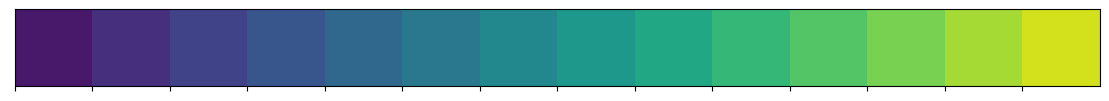

In [5]:
custom_palette = sns.color_palette("viridis", 14) 
sns.palplot(custom_palette)

In [6]:
ds_before_2019 = ds[ds["Year"] < 2019]
ds_before_2019

ds_after_2019 = ds[ds["Year"] > 2018]
ds_after_2019

unique_sensors = ds_after_2019["Sensor Number"].unique()
unique_sensors

array(['S56', 'S55', 'S112', 'S114', 'S115', 'S119'], dtype=object)

In [7]:
ds_S119 = ds[ds["Sensor Number"] == "S119"] #custom_palette[13]
ds_S115 = ds[ds["Sensor Number"] == "S115"] #custom_palette[12]
ds_S114 = ds[ds["Sensor Number"] == "S114"] #custom_palette[8]
ds_S112 = ds[ds["Sensor Number"] == "S112"] #custom_palette[5]
ds_S55 = ds[ds["Sensor Number"] == "S55"]  #custom_palette[2]
ds_S56 = ds[ds["Sensor Number"] == "S56"] #custom_palette[0]

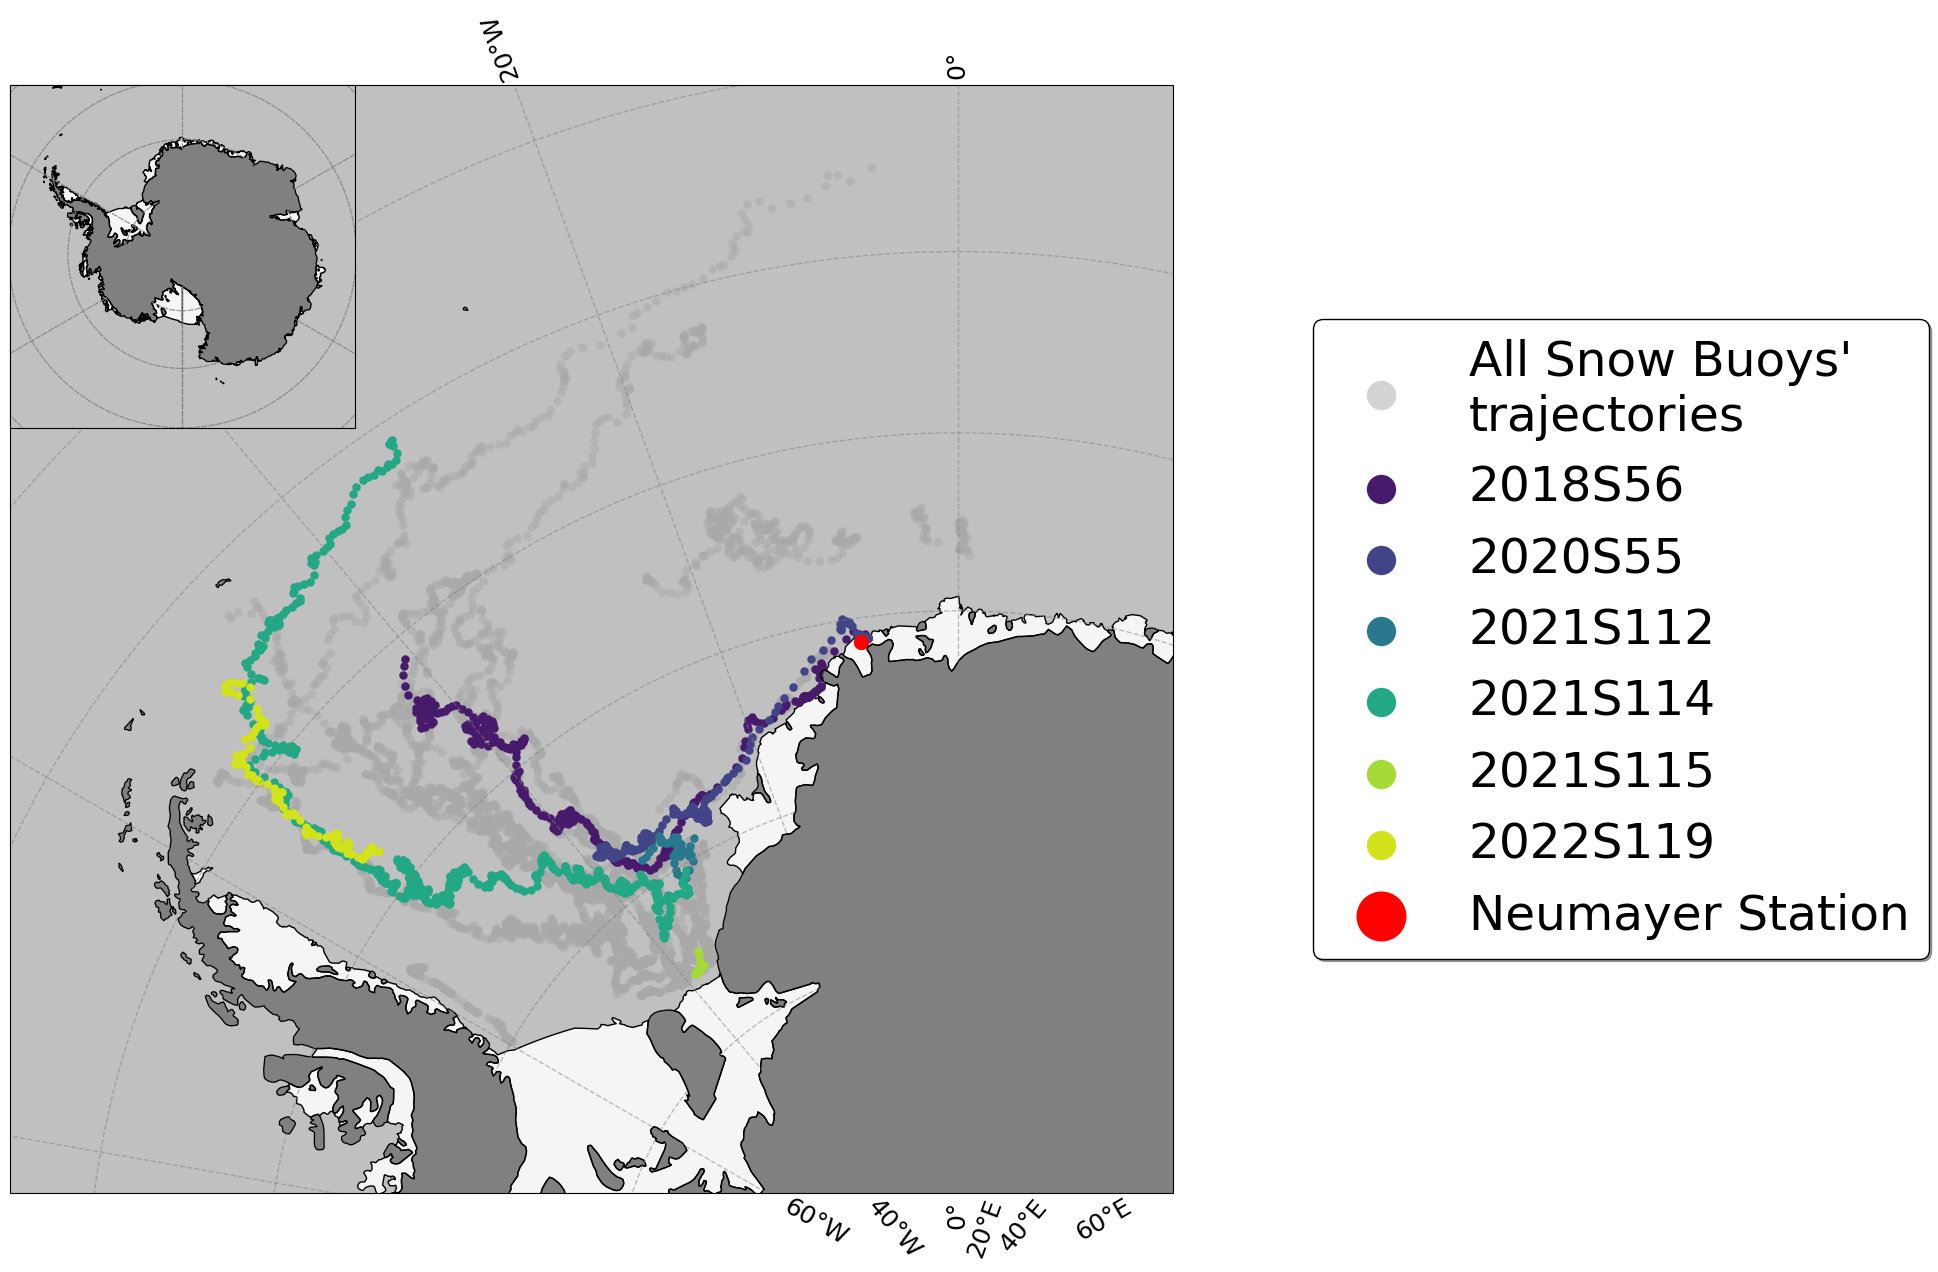

In [8]:
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw={"projection": ccrs.SouthPolarStereo()})

# Weddell Sea region
extent = [-50, 10, -85, -55]
ax.set_extent(extent, crs=ccrs.PlateCarree())

# Add natural features
ax.add_feature(cfeature.LAND.with_scale("50m"), facecolor="grey", zorder=0)
ax.add_feature(cfeature.OCEAN, facecolor="silver", zorder=0)
ax.add_feature(Ice_shelves, facecolor="whitesmoke", edgecolor="black", zorder=0)

ax.coastlines()

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="gray", alpha=0.5, linestyle="--")
gl.top_labels = True  
gl.right_labels = True  
gl.left_labels = True  
gl.bottom_labels = True  
gl.xlabel_style = {"size": 18}
gl.ylabel_style = {"size": 18}

# Snow Buoys trajectories
ax.scatter(ds_before_2019["Longitude"], ds_before_2019["Latitude"], color="darkgrey", alpha = 0.5,
           transform=ccrs.PlateCarree(), marker="o", label="All Snow Buoys'\ntrajectories", linewidth=0.09)

ax.scatter(ds_S56["Longitude"], ds_S56["Latitude"], color=custom_palette[0], 
           transform=ccrs.PlateCarree(), marker="o", label="2018S56", linewidth=0.09)

ax.scatter(ds_S55["Longitude"], ds_S55["Latitude"], color=custom_palette[2], 
           transform=ccrs.PlateCarree(), marker="o", label="2020S55", linewidth=0.09)

ax.scatter(ds_S112["Longitude"], ds_S112["Latitude"], color=custom_palette[5], 
           transform=ccrs.PlateCarree(), marker="o", label="2021S112", linewidth=0.09)

ax.scatter(ds_S114["Longitude"], ds_S114["Latitude"], color=custom_palette[8], 
           transform=ccrs.PlateCarree(), marker="o", label="2021S114", linewidth=0.09)

ax.scatter(ds_S115["Longitude"], ds_S115["Latitude"], color=custom_palette[12], 
           transform=ccrs.PlateCarree(), marker="o", label="2021S115", linewidth=0.09)

ax.scatter(ds_S119["Longitude"], ds_S119["Latitude"], color=custom_palette[13],
           transform=ccrs.PlateCarree(), marker="o", label="2022S119", linewidth=0.09)


# Add a red dot for Neumayer Station
neumayer_lat, neumayer_lon = -70.683, -8.283
ax.scatter(neumayer_lon, neumayer_lat, color="red", s=100, transform=ccrs.PlateCarree(), marker="o", label="Neumayer Station")

plt.legend(loc="center left", bbox_to_anchor=(1.1, 0.50), fancybox=True, shadow=True, edgecolor="black", ncol=1, 
           markerscale=3.5, fontsize=35)


# Create an inset map showing the entire Antarctica
ax_inset = fig.add_axes([0.125, 0.635, 0.23, 0.23], projection=ccrs.SouthPolarStereo())
ax_inset.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
ax_inset.add_feature(cfeature.LAND.with_scale("50m"), facecolor="grey")
ax_inset.add_feature(cfeature.OCEAN, facecolor="silver")
ax_inset.add_feature(Ice_shelves, facecolor="whitesmoke", edgecolor="black")
ax_inset.coastlines()
ax_inset.gridlines(linewidth=0.5, color="gray", linestyle="--")
gl = ax_inset.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color="gray", alpha=0.5, linestyle="--")

plt.savefig("Buoys_trajectories_Neumayer.png", bbox_inches="tight", dpi=300)
plt.show()



<div class="alert alert-danger" role="alert">

### <a id="section2.2"></a>Snow Depth from April to November
[Back to top](#TOC_TOP)

</div>

In [9]:
# List of months
months = [4, 5, 6, 7, 8, 9, 10, 11]

# Filter for the specified months
filtered_ds_months = ds[ds["Month"].isin(months)]

In [10]:
filtered_ds_months.groupby("Month").count()

,Year,Day,Datenum,Latitude,Longitude,Mean snow accu,Mean snow ice,Mean snow depth,Mean sea ice thickness,Sensor Number,timestamp
Month,,,,,,,,,,,
4,695,695,695,695,695,695,695,695,695,695,695
5,631,631,631,631,631,631,631,631,631,631,631
6,566,566,566,566,566,566,566,566,566,566,566
7,575,575,575,575,575,575,575,565,575,575,575
8,588,588,588,588,588,588,588,587,588,588,588
9,517,517,517,517,517,517,517,517,517,517,517
10,470,470,470,470,470,470,470,470,470,470,470
11,409,409,409,409,409,409,409,409,409,409,409


<div class="alert alert-danger" role="alert">

### <a id="section2.3"></a>Availability of Snow Buoy in the years 2019, 2020, 2021 and 2022
[Back to top](#TOC_TOP)

</div>

In [11]:
# List of years
years = [2019, 2020, 2021, 2022]

# Iterate over years
for year in years:
    # Filter for the years
    filtered_ds = filtered_ds_months[filtered_ds_months["Year"] == year]
    
    if year == 2019:
        ds_2019 = filtered_ds
    elif year == 2020:
        ds_2020 = filtered_ds
    elif year == 2021:
        ds_2021 = filtered_ds
    elif year == 2022:
        ds_2022 = filtered_ds

In [12]:
#no snow data in July in satellite product
ds_2019 = ds_2019[ds_2019["Month"] != 7]
ds_2019 = ds_2019.reset_index(drop=True)
ds_2019.groupby("Month").count()

,Year,Day,Datenum,Latitude,Longitude,Mean snow accu,Mean snow ice,Mean snow depth,Mean sea ice thickness,Sensor Number,timestamp
Month,,,,,,,,,,,
4,30,30,30,30,30,30,30,30,30,30,30
5,31,31,31,31,31,31,31,31,31,31,31
6,30,30,30,30,30,30,30,30,30,30,30
8,31,31,31,31,31,31,31,31,31,31,31
9,30,30,30,30,30,30,30,30,30,30,30
10,31,31,31,31,31,31,31,31,31,31,31
11,30,30,30,30,30,30,30,30,30,30,30


In [13]:
ds_2020 = ds_2020.reset_index(drop=True)
ds_2020.groupby("Month").count()

,Year,Day,Datenum,Latitude,Longitude,Mean snow accu,Mean snow ice,Mean snow depth,Mean sea ice thickness,Sensor Number,timestamp
Month,,,,,,,,,,,
7,1,1,1,1,1,1,1,1,1,1,1
8,31,31,31,31,31,31,31,31,31,31,31
9,30,30,30,30,30,30,30,30,30,30,30
10,31,31,31,31,31,31,31,31,31,31,31
11,30,30,30,30,30,30,30,30,30,30,30


In [14]:
ds_2021 = ds_2021.reset_index(drop=True)
ds_2021.groupby("Month").count()

,Year,Day,Datenum,Latitude,Longitude,Mean snow accu,Mean snow ice,Mean snow depth,Mean sea ice thickness,Sensor Number,timestamp
Month,,,,,,,,,,,
4,90,90,90,90,90,90,90,90,90,90,90
5,66,66,66,66,66,66,66,66,66,66,66
6,60,60,60,60,60,60,60,60,60,60,60
7,43,43,43,43,43,43,43,43,43,43,43
8,31,31,31,31,31,31,31,31,31,31,31
9,30,30,30,30,30,30,30,30,30,30,30
10,31,31,31,31,31,31,31,31,31,31,31
11,30,30,30,30,30,30,30,30,30,30,30


In [15]:
#no snow data in Oct and Nov in satellite product
ds_2022 = ds_2022[ds_2022["Month"] != 10]
ds_2022 = ds_2022[ds_2022["Month"] != 11]
ds_2022 = ds_2022.reset_index(drop=True)
ds_2022.groupby("Month").count()

,Year,Day,Datenum,Latitude,Longitude,Mean snow accu,Mean snow ice,Mean snow depth,Mean sea ice thickness,Sensor Number,timestamp
Month,,,,,,,,,,,
4,60,60,60,60,60,60,60,60,60,60,60
5,62,62,62,62,62,62,62,62,62,62,62
6,37,37,37,37,37,37,37,37,37,37,37
7,31,31,31,31,31,31,31,31,31,31,31
8,31,31,31,31,31,31,31,31,31,31,31
9,30,30,30,30,30,30,30,30,30,30,30


In [16]:
ds_2019.groupby("Sensor Number").count()

,Year,Month,Day,Datenum,Latitude,Longitude,Mean snow accu,Mean snow ice,Mean snow depth,Mean sea ice thickness,timestamp
Sensor Number,,,,,,,,,,,
S56,213,213,213,213,213,213,213,213,213,213,213


In [17]:
ds_2020.groupby("Sensor Number").count()

,Year,Month,Day,Datenum,Latitude,Longitude,Mean snow accu,Mean snow ice,Mean snow depth,Mean sea ice thickness,timestamp
Sensor Number,,,,,,,,,,,
S55,123,123,123,123,123,123,123,123,123,123,123


There is one Snow Buoy in 2020 but it does not drift! It breaks of the fast ice later and is drifting in 2021 (2020S55).

In [18]:
ds_2021.groupby("Sensor Number").count()

,Year,Month,Day,Datenum,Latitude,Longitude,Mean snow accu,Mean snow ice,Mean snow depth,Mean sea ice thickness,timestamp
Sensor Number,,,,,,,,,,,
S112,34,34,34,34,34,34,34,34,34,34,34
S114,244,244,244,244,244,244,244,244,244,244,244
S55,103,103,103,103,103,103,103,103,103,103,103


In [19]:
ds_2022.groupby("Sensor Number").count()

,Year,Month,Day,Datenum,Latitude,Longitude,Mean snow accu,Mean snow ice,Mean snow depth,Mean sea ice thickness,timestamp
Sensor Number,,,,,,,,,,,
S114,183,183,183,183,183,183,183,183,183,183,183
S119,68,68,68,68,68,68,68,68,68,68,68


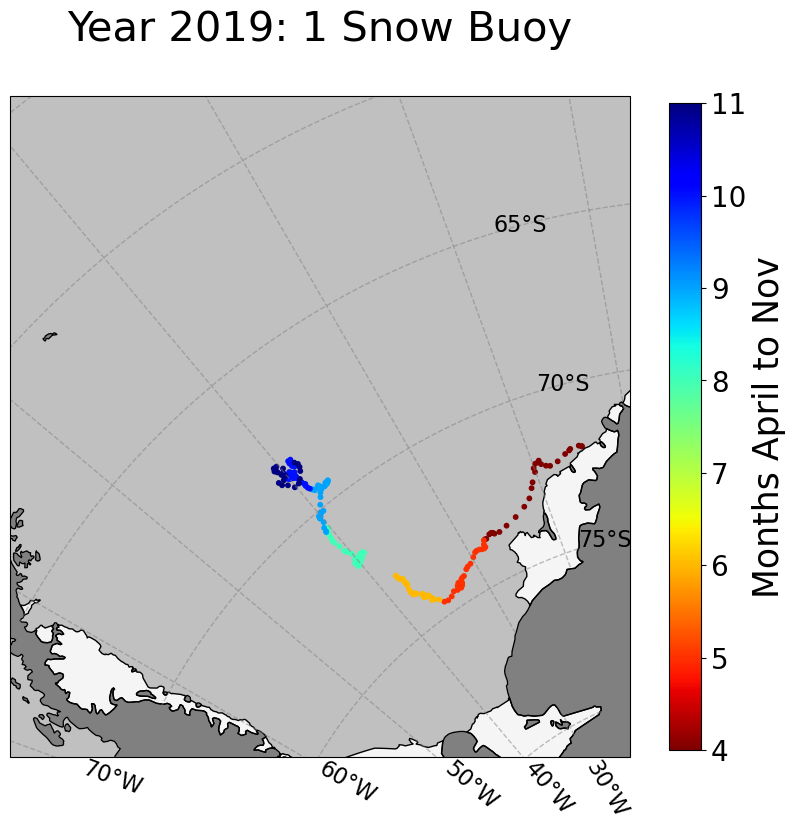

In [20]:
fig, ax = plt.subplots(figsize=(10, 12), subplot_kw={"projection": ccrs.SouthPolarStereo()})

#Weddell Sea region
extent = [-50, -15, -78, -61]
ax.set_extent(extent, crs=ccrs.PlateCarree())

# Add natural feature: Ice shelves
ax.add_feature(cfeature.LAND.with_scale("50m"), facecolor="grey")
ax.add_feature(cfeature.OCEAN, facecolor="silver")
ax.add_feature(Ice_shelves, facecolor="whitesmoke", edgecolor="black")

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="gray", alpha=0.5, linestyle="--")
gl.top_labels = False  
gl.right_labels = True  
gl.left_labels = True  
gl.bottom_labels = True  
gl.xlabel_style = {"size": 16}
gl.ylabel_style = {"size": 16}

ax.coastlines()


x = ds_2019["Longitude"]
y = ds_2019["Latitude"]
scatters = plt.scatter(x, y, c=ds_2019["Month"], cmap="jet_r", vmin = 4, vmax = 11,
                       s=10, transform=ccrs.PlateCarree())
cbar = plt.colorbar(scatters, location="right", shrink=0.7, label="Months April to Nov")
cbar.set_label("Months April to Nov", fontsize=25)
cbar.ax.tick_params(labelsize=20) 


ax.set_title("Year 2019: 1 Snow Buoy\n", fontsize = 30)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")


plt.savefig("Snow_Buoy_2019.png", bbox_inches="tight", dpi=300)
plt.show()



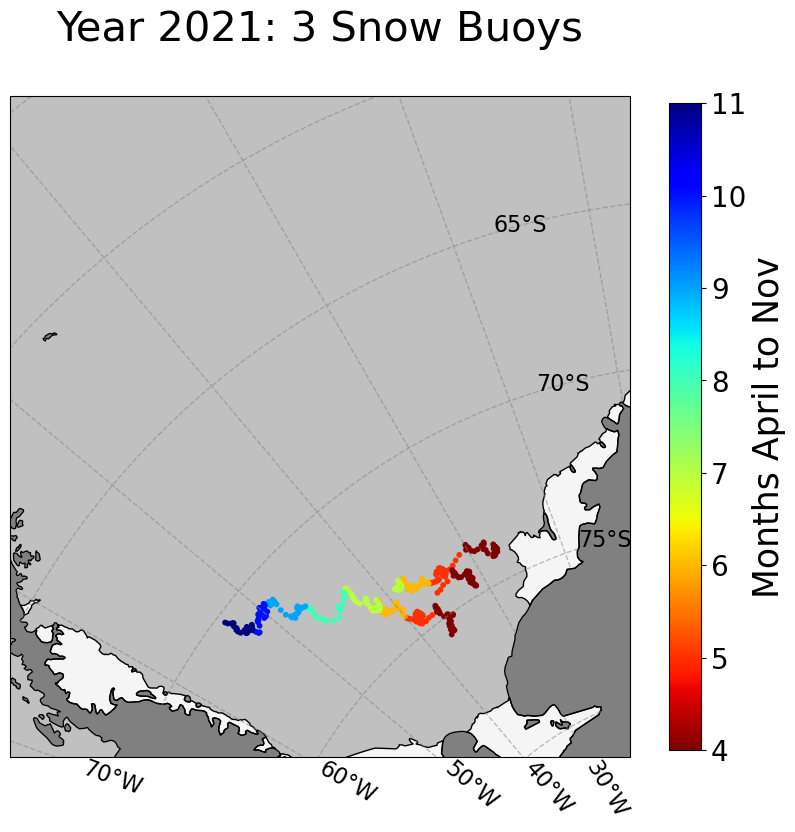

In [21]:
fig, ax = plt.subplots(figsize=(10, 12), subplot_kw={"projection": ccrs.SouthPolarStereo()})

#Weddell Sea region
extent = [-50, -15, -78, -61]
ax.set_extent(extent, crs=ccrs.PlateCarree())

# Add natural feature: Ice shelves
ax.add_feature(cfeature.LAND.with_scale("50m"), facecolor="grey")
ax.add_feature(cfeature.OCEAN, facecolor="silver")
ax.add_feature(Ice_shelves, facecolor="whitesmoke", edgecolor="black")

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="gray", alpha=0.5, linestyle="--")
gl.top_labels = False  
gl.right_labels = True  
gl.left_labels = True  
gl.bottom_labels = True  
gl.xlabel_style = {"size": 16}
gl.ylabel_style = {"size": 16}

ax.coastlines()


x = ds_2021["Longitude"]
y = ds_2021["Latitude"]
scatters = plt.scatter(x, y, c=ds_2021["Month"], cmap="jet_r", vmin = 4, vmax = 11,
                       s=10, transform=ccrs.PlateCarree())
cbar = plt.colorbar(scatters, location="right", shrink=0.7, label="Months April to Nov")
cbar.set_label("Months April to Nov", fontsize=25)
cbar.ax.tick_params(labelsize=20) 


ax.set_title("Year 2021: 3 Snow Buoys\n", fontsize = 30)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")


plt.savefig("Snow_Buoy_2021.png", bbox_inches="tight", dpi=300)
plt.show()



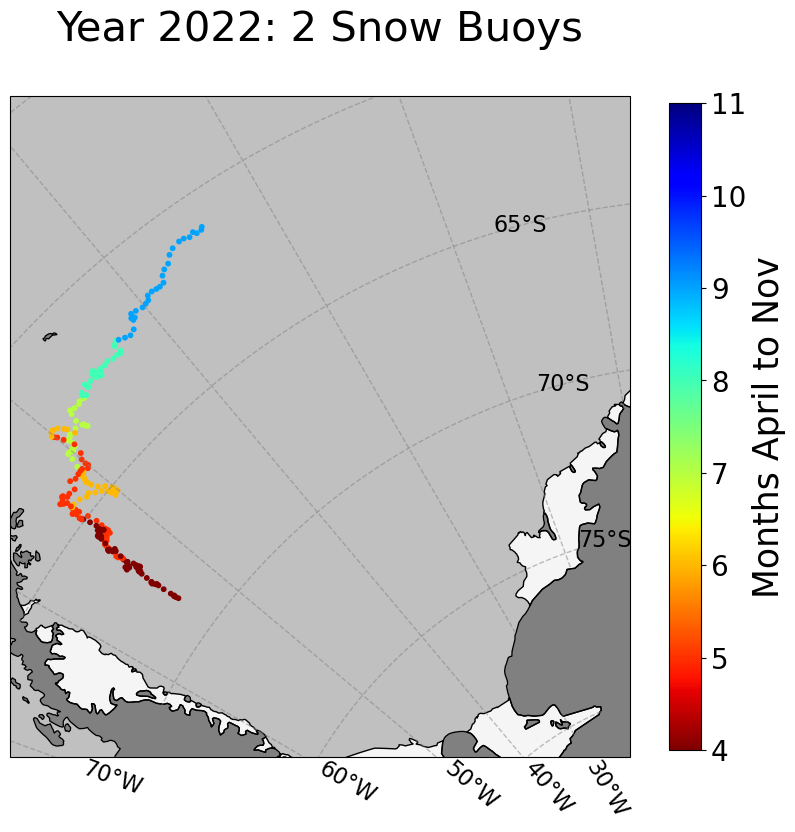

In [22]:
fig, ax = plt.subplots(figsize=(10, 12), subplot_kw={"projection": ccrs.SouthPolarStereo()})

#Weddell Sea region
extent = [-50, -15, -78, -61]
ax.set_extent(extent, crs=ccrs.PlateCarree())

# Add natural feature: ice shelves
ax.add_feature(cfeature.LAND.with_scale("50m"), facecolor="grey")
ax.add_feature(cfeature.OCEAN, facecolor="silver")
ax.add_feature(Ice_shelves, facecolor="whitesmoke", edgecolor="black")

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="gray", alpha=0.5, linestyle="--")
gl.top_labels = False  
gl.right_labels = True  
gl.left_labels = True  
gl.bottom_labels = True  
gl.xlabel_style = {"size": 16}
gl.ylabel_style = {"size": 16}

ax.coastlines()


x = ds_2022["Longitude"]
y = ds_2022["Latitude"]
scatters = plt.scatter(x, y, c=ds_2022["Month"], cmap="jet_r", vmin = 4, vmax = 11,
                       s=10, transform=ccrs.PlateCarree())
cbar = plt.colorbar(scatters, location="right", shrink=0.7, label="Months April to Nov")
cbar.set_label("Months April to Nov", fontsize=25)
cbar.ax.tick_params(labelsize=20) 


ax.set_title("Year 2022: 2 Snow Buoys\n", fontsize = 30)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")


plt.savefig("Snow_Buoy_2022.png", bbox_inches="tight", dpi=300)
plt.show()



<div class="alert alert-danger" role="alert">

### <a id="section2.4"></a>Convert Lon and Lat to EPSG:3412
[Back to top](#TOC_TOP)

</div>

In [23]:
transformer = Transformer.from_crs("EPSG:4326", "EPSG:3412") #(in and out)

# Function to apply transformation to each row
def convert_coordinates(row):
    lat, lon = row["Latitude"], row["Longitude"]
    new_lat, new_lon = transformer.transform(lat, lon)
    return pd.Series({"X": new_lat, "Y": new_lon})


In [24]:
ds_2019 = pd.concat([ds_2019, ds_2019.apply(convert_coordinates, axis=1)], axis=1)
ds_2021 = pd.concat([ds_2021, ds_2021.apply(convert_coordinates, axis=1)], axis=1)
ds_2022 = pd.concat([ds_2022, ds_2022.apply(convert_coordinates, axis=1)], axis=1)

<div class="alert alert-info" role="alert">

## <a id="section3"></a>Snow Depth from Daily KaKo20 Product
[Back to top](#TOC_TOP)

</div>

<div class="alert alert-danger" role="alert">

### <a id="section3.1"></a>Load Grid File
[Back to top](#TOC_TOP)

</div>

In [25]:
#load grid of Satellite Product 
df = pd.read_csv("KacimiandKwok_ANT_SnowThickness/lat_lon_file.txt", delimiter="\s+", names = ["X", "Y", "lat", "lon"])
df

,X,Y,lat,lon
0,-3500.0,-3500.0,-46.44925,-135.00000
1,-3475.0,-3500.0,-46.59050,-135.20536
2,-3450.0,-3500.0,-46.73138,-135.41219
3,-3425.0,-3500.0,-46.87187,-135.62051
4,-3400.0,-3500.0,-47.01197,-135.83032
...,...,...,...,...
83995,3375.0,3975.0,-44.34611,40.33314
83996,3400.0,3975.0,-44.21832,40.54189
83997,3425.0,3975.0,-44.09009,40.74935
83998,3450.0,3975.0,-43.96145,40.95551


<div class="alert alert-danger" role="alert">

### <a id="section3.2"></a>Year 2019
[Back to top](#TOC_TOP)

</div>

In [26]:
def Load_Daily_KaKo20(base_dir, df, year):
    
    dictionary = {}
    
    # List of months and their corresponding number of days
    months_days = {
        "04": 30,  # April
        "05": 31,  # May
        "06": 30,  # June
        "07": 31,  # July
        "08": 31,  # August
        "09": 30,  # September
        "10": 31,  # October
        "11": 30   # November
    }

    # Loop through each month
    for month, days in months_days.items():
        dfs_month = []
        for day in range(1, days + 1):
            # Construct file path and column name
            file_path = f"{base_dir}Daily_sd_Kirsten_{year}{month}{day:02d}.txt"
            column_name = f"20{year}-{month}-{day:02d}"

            try:
                df_daily = pd.read_csv(file_path, delimiter="\s+", names=[column_name])
                dfs_month.append(df_daily)
            except FileNotFoundError:
                #print(f"File not found: {file_path}.")
                continue

        # Concatenate all DataFrames for the current month
        if dfs_month:
            df_snow_month = pd.concat(dfs_month, axis=1)

            df_snow_lon_lat_month = pd.concat([df, df_snow_month], axis=1)

            # Filter out the Weddell Region
            df_Weddell = df_snow_lon_lat_month[df_snow_lon_lat_month["lon"] < 15]
            df_snow_lon_lat_month = df_Weddell[df_Weddell["lon"] > -62]

            # Reset index
            df_snow_lon_lat_month = df_snow_lon_lat_month.reset_index(drop=True)

            # Replace -999.0 with NaN
            df_snow_lon_lat_month = df_snow_lon_lat_month.replace(-999.0, np.nan)

            dictionary[month] = df_snow_lon_lat_month
    
    print("Daily Snow Depth Data is loaded.")
        
    return dictionary

In [27]:
base_dir = "Daily_Snow_Depth_Data/For_Kirsten/"

dfs_by_month_2019 = Load_Daily_KaKo20(base_dir, df, 19)

Daily Snow Depth Data is loaded.


The resulting DataFrames for each month are stored in dfs_by_month_2019 dictionary. To access them by month numbers, e.g., dfs_by_month["04"] for April:

In [28]:
df_Snow_Weddell_2019_April = dfs_by_month_2019["04"]
df_Snow_Weddell_2019_April

,X,Y,lat,lon,2019-04-01,2019-04-02,2019-04-03,2019-04-04,2019-04-05,2019-04-06,...,2019-04-21,2019-04-22,2019-04-23,2019-04-24,2019-04-25,2019-04-26,2019-04-27,2019-04-28,2019-04-29,2019-04-30
0,0.0,0.0,-90.00000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-25.0,25.0,-89.67363,-45.00000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,25.0,-89.76922,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-75.0,50.0,-89.16794,-56.30993,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-50.0,50.0,-89.34727,-45.00000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20566,950.0,3975.0,-53.50889,13.44121,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20567,975.0,3975.0,-53.45973,13.78160,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20568,1000.0,3975.0,-53.40938,14.12100,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20569,1025.0,3975.0,-53.35785,14.45939,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


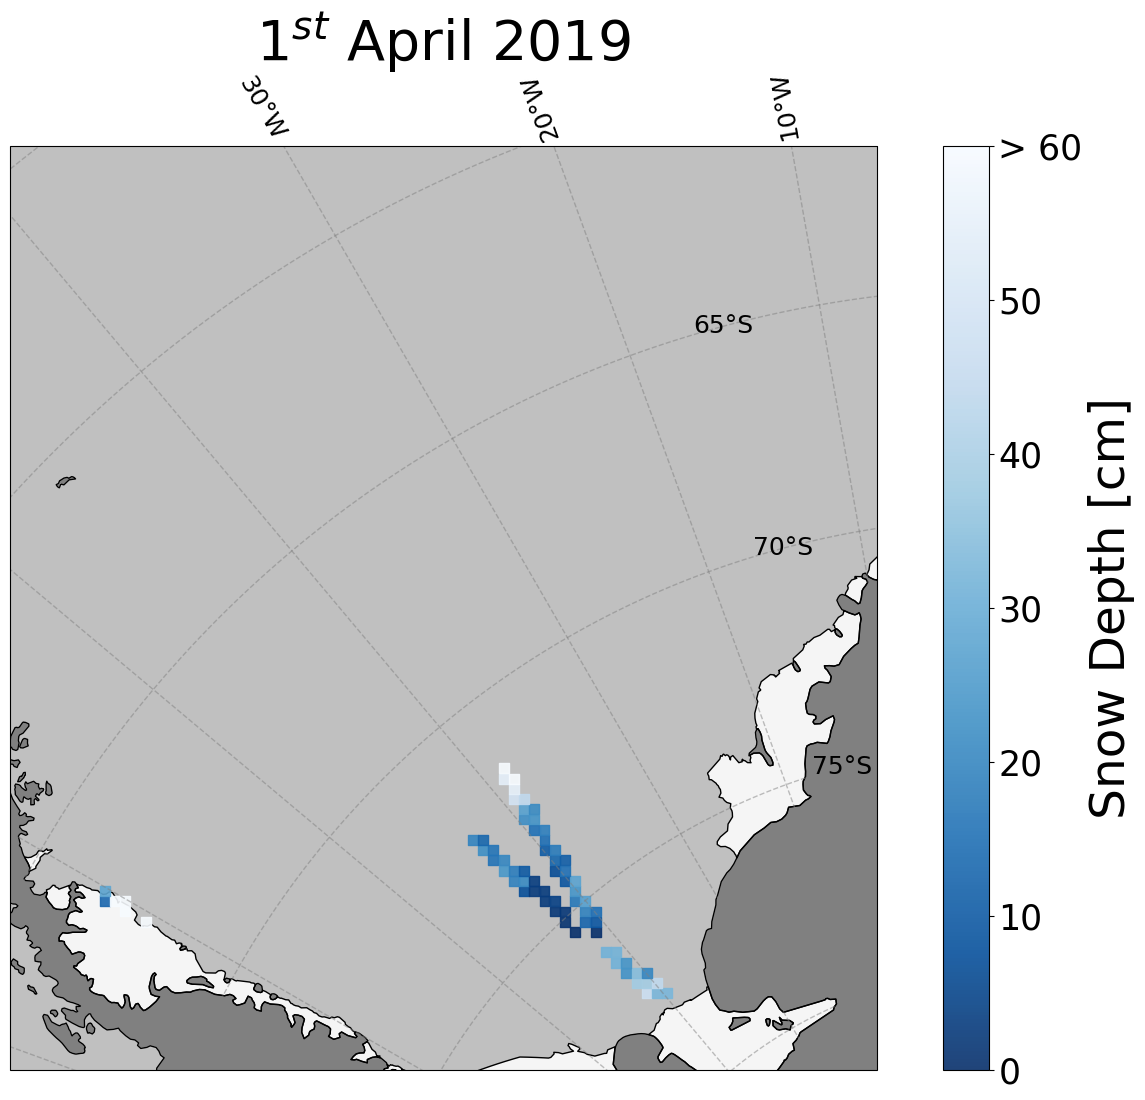

In [29]:
fig, ax = plt.subplots(figsize=(17, 12), subplot_kw={"projection": ccrs.SouthPolarStereo()})


x = df_Snow_Weddell_2019_April["lon"]
y = df_Snow_Weddell_2019_April["lat"]

scatter = (plt.scatter(x, y, c=df_Snow_Weddell_2019_April["2019-04-01"],
                       marker="s", cmap="Blues_r", s=50, alpha=0.9, transform=ccrs.PlateCarree(), 
                       vmin=0, vmax=60))

cbar = plt.colorbar(scatter, location="right", label="Snow Depth [cm]")
cbar.set_label("Snow Depth [cm]", fontsize=35)

cbar_ticks = np.linspace(0, 60, num=7)  
cbar_ticklabels = [str(int(tick)) for tick in cbar_ticks]  # Convert ticks to strings
cbar_ticklabels[-1] = "> 60"  # Replace the last label with "> 60"

cbar.ax.tick_params(labelsize=25) 

cbar.set_ticks(cbar_ticks)
cbar.ax.set_yticklabels(cbar_ticklabels)

# Weddell Sea region
extent = [-50, -15, -78, -61]
ax.set_extent(extent, crs=ccrs.PlateCarree())



# Add natural features
ax.add_feature(cfeature.LAND.with_scale("50m"), facecolor="grey", zorder=0)
ax.add_feature(cfeature.OCEAN, facecolor="silver", zorder=0)
ax.add_feature(Ice_shelves, facecolor="whitesmoke", edgecolor="black", zorder=0)

ax.coastlines()

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="gray", alpha=0.5, linestyle="--")
gl.top_labels = True  
gl.right_labels = True  
gl.left_labels = True  
gl.bottom_labels = False  # Do not show bottom longitude labels
gl.xlabel_style = {"size": 18}
gl.ylabel_style = {"size": 18}

ax.set_title("$1^{st}$ April 2019", fontsize=40)

plt.savefig("DailySnow_1April.png", bbox_inches="tight", dpi=300)
plt.show()

## Animation for April 2019

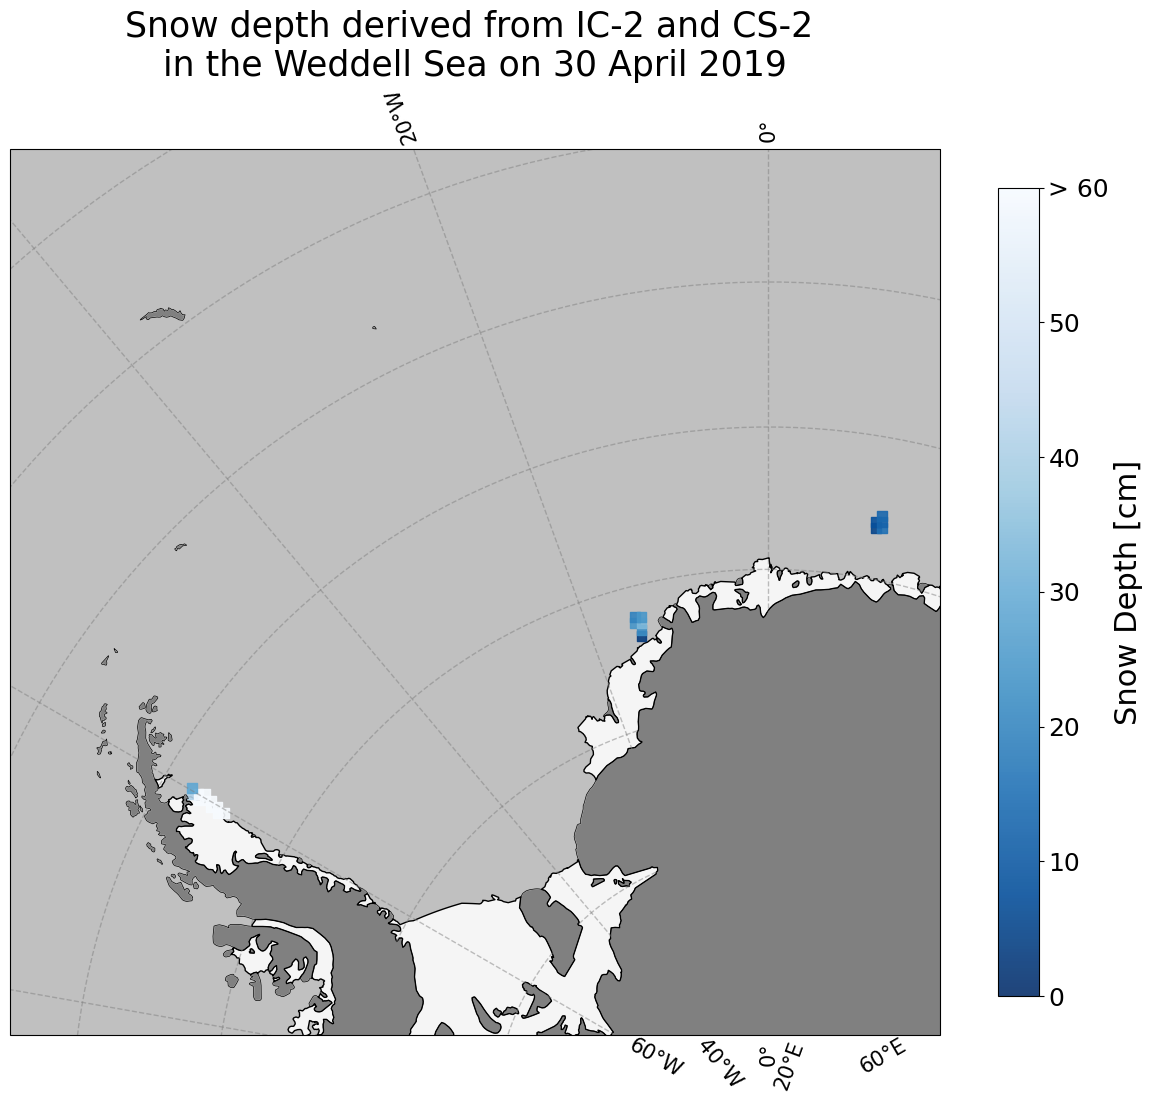

In [30]:
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw={"projection": ccrs.SouthPolarStereo()})

# Define the extent and features
extent = [-50, 10, -85, -55]
ax.set_extent(extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND.with_scale("50m"), facecolor="grey", zorder=0)
ax.add_feature(cfeature.OCEAN, facecolor="silver", zorder=0)
ax.add_feature(Ice_shelves, facecolor="whitesmoke", edgecolor="black", zorder=0)
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="gray", alpha=0.5, linestyle="--")
gl.xlabel_style = {"size": 15}
gl.ylabel_style = {"size": 15}

x = df_Snow_Weddell_2019_April["lon"]
y = df_Snow_Weddell_2019_April["lat"]

# Initialize scatter plot with initial data (day 1)
column_name = "2019-04-01"

scatters = ax.scatter(x, y, c=df_Snow_Weddell_2019_April[column_name],
                       marker="s", cmap="Blues_r", s=50, alpha=0.9, transform=ccrs.PlateCarree(), 
                       vmin=0, vmax=60)

cbar = plt.colorbar(scatters, location="right", shrink=0.7, label="Snow depth [cm]")
cbar.set_label("Snow Depth [cm]", fontsize=22)

cbar_ticks = np.linspace(0, 60, num=7)
cbar_ticklabels = [str(int(tick)) for tick in cbar_ticks]
cbar_ticklabels[-1] = "> 60"

cbar.ax.tick_params(labelsize=18)
cbar.set_ticks(cbar_ticks)
cbar.ax.set_yticklabels(cbar_ticklabels)



def update(day):
    column_name = f"2019-04-{day:02d}"
    scatters.set_offsets(np.c_[x, y])
    scatters.set_array(df_Snow_Weddell_2019_April[column_name])
    scatters.set_cmap("Blues_r")
    ax.set_title(f"Snow depth derived from IC-2 and CS-2 \nin the Weddell Sea on {day} April 2019", fontsize=25)

    cbar.set_ticks(cbar_ticks)
    cbar.ax.set_yticklabels(cbar_ticklabels)
    
    return scatters, ax

ani = FuncAnimation(fig, update, frames=range(1, 31), blit=False)


# To save the animation as a GIF file using PillowWriter
ani.save("snow_depth_april_2019_with_Buoy02.gif", writer=PillowWriter(fps=2)) 

plt.show()


<div class="alert alert-danger" role="alert">

### <a id="section3.3"></a>Year 2021
[Back to top](#TOC_TOP)

</div>

In [31]:
base_dir = "Daily_Snow_Depth_Data/For_Kirsten/"

dfs_by_month_2021 = Load_Daily_KaKo20(base_dir, df, 21)

Daily Snow Depth Data is loaded.


<div class="alert alert-danger" role="alert">

### <a id="section3.4"></a>Year 2022
[Back to top](#TOC_TOP)

</div>

In [32]:
base_dir = "Daily_Snow_Depth_Data/For_Kirsten/"

dfs_by_month_2022 = Load_Daily_KaKo20(base_dir, df, 22)

Daily Snow Depth Data is loaded.


<div class="alert alert-info" role="alert">

## <a id="section4"></a>Temporal and Spatial Alignment
[Back to top](#TOC_TOP)

</div>

<div class="alert alert-danger" role="alert">

### <a id="section4.1"></a>Function for the Extraction of X and Y Where In-situ Data is Available
[Back to top](#TOC_TOP)

</div>

In [33]:
def extract_X_and_Y_where_insitu_data(dataframe):
    
    # Extract the latitude, longitude
    lats = dataframe["Y"].values/1000  #devide by 1000 to get km 
    lons = dataframe["X"].values/1000

    # Create a custom grid    
    lon_bins = np.linspace(-3512.5, 1062.5, 184)
    lat_bins = np.linspace(-12.5, 3987.5, 161)

    # Create 2D histogram to get density values
    density, _, _ = np.histogram2d(lats, lons, bins=[lat_bins, lon_bins])
    
    # Exclude zero values
    nonzero_density = density[density != 0]
    
    lenght = len(nonzero_density)
    
    x_values = np.arange(0, lenght, 1)
        
    #Create a boolean mask for density values >= 1
    density_mask = density >= 1

    # Get the x and y coordinates of the grid cells that meet the condition
    x_values = np.where(density_mask)[1]
    y_values = np.where(density_mask)[0]


    # Create a list of tuples containing the x and y coordinates
    #the return give us the number of the postion of the lon and lat grid which is not empty
    grid_cells = list(zip(x_values, y_values))
    
    grid_cells_x_y =[]

    lon_bins = np.linspace(-3512.5, 1062.5, 184)
    lat_bins = np.linspace(-12.5, 3987.5, 161)

    for i, j in grid_cells: 
        a = lon_bins[i]+12.5
        b = lat_bins[j]+12.5
        grid_cells_x_y.append((a, b))

    return grid_cells_x_y

<div class="alert alert-danger" role="alert">

### <a id="section4.2"></a>Matches for the Year 2019
[Back to top](#TOC_TOP)

</div>

In [34]:
columns = ["Year", "Month", "Day",  "X", "Y", "Snow_depth_satellite", "Snow_depth_buoy", "Mean_snow_accu", 
           "X_buoy", "Y_buoy", "Sensor_Number", "lat_buoy", "lon_buoy"]
results_df = pd.DataFrame(columns=columns)
new_rows = []

for month in range(4, 12):  
    month_str = f"{month:02d}"
    
    for day in range(1, 31):
        X_Y_Values_for_month_day = extract_X_and_Y_where_insitu_data(ds_2019[(ds_2019["Month"] == int(month)) & 
                                                                             (ds_2019["Day"] == day)])
    
        day_sat = f"2019-{month_str}-{day:02d}"

        # Check if the column exists in the DataFrame
        if day_sat not in dfs_by_month_2019[month_str].columns:
            print(f"Column {day_sat} not found in the DataFrame for month {month_str}. Skipping to the next day.")
            continue

        for i, j in X_Y_Values_for_month_day:
            snow_depth_value_sat = dfs_by_month_2019[month_str].loc[(dfs_by_month_2019[month_str]["X"] == i) & 
                                                            (dfs_by_month_2019[month_str]["Y"] == j)][day_sat].values
            

            #Snow depth from buoy
            snow_depth_value_buoy = ds_2019[(ds_2019["Month"] == month) &
                                            (ds_2019["Day"] == day)].copy()
            
            distance = np.sqrt((snow_depth_value_buoy["X"] - i * 1000) ** 2 + (snow_depth_value_buoy["Y"] - j * 1000) ** 2)

            snow_depth_value_buoy.loc[:, "distance"] = distance
                        
            min_distance_index = snow_depth_value_buoy["distance"].idxmin()
            mean_snow_depth = snow_depth_value_buoy.loc[min_distance_index, "Mean snow depth"]
            
            #Lon and Lat
            lon = snow_depth_value_buoy.loc[min_distance_index, "Longitude"]
            lat = snow_depth_value_buoy.loc[min_distance_index, "Latitude"]
            
            
            #Snow accu from buoy
            snow_accu = ds_2019[(ds_2019["Month"] == month) &
                                            (ds_2019["Day"] == day)].copy()
            
            distance = np.sqrt((snow_accu["X"] - i * 1000) ** 2 + (snow_accu["Y"] - j * 1000) ** 2)

            snow_accu.loc[:, "distance"] = distance
            
            min_distance_index = snow_accu["distance"].idxmin()
            
             #X and Y of Buoy
            X = snow_accu.loc[min_distance_index, "X"]/1000
            Y = snow_accu.loc[min_distance_index, "Y"]/1000
            
            #Sensor Number
            Sensor_Nr = snow_accu.loc[min_distance_index, "Sensor Number"]
            
            snow_accu = snow_accu.loc[min_distance_index, "Mean snow accu"]
        
    
            # Only append non-NaN values
            if not np.isnan(snow_depth_value_sat).all():
                # Flatten the data_values if it contains more than one value (e.g., an array)
                snow_depth_value_sat = np.ravel(snow_depth_value_sat)
                for value in snow_depth_value_sat:
                    if not np.isnan(value):
                        new_row = {"Year": 2019, "Month": month, "Day": day, "X": i, "Y": j, 
                                   "Snow_depth_satellite": value, "Snow_depth_buoy": mean_snow_depth, 
                                  "Mean_snow_accu": snow_accu, "X_buoy": X, "Y_buoy": Y, "Sensor_Number": Sensor_Nr,
                                  "lat_buoy": lat, "lon_buoy": lon}
                        new_rows.append(new_row)

if new_rows:
    results_df = pd.concat([results_df, pd.DataFrame(new_rows)], ignore_index=True)


matches_2019 = results_df

In [35]:
matches_2019

,Year,Month,Day,X,Y,Snow_depth_satellite,Snow_depth_buoy,Mean_snow_accu,X_buoy,Y_buoy,Sensor_Number,lat_buoy,lon_buoy
0,2019,5,6,-850.0,1550.0,11.35041,69.652,106.428,-852.700889,1548.047796,S56,-73.7900,-28.8470
1,2019,5,22,-900.0,1425.0,23.25146,69.014,105.882,-911.347875,1433.840884,S56,-74.4098,-32.4400
2,2019,6,23,-1100.0,1425.0,29.40812,68.443,105.311,-1101.271050,1432.386386,S56,-73.4330,-37.5544
3,2019,9,9,-1400.0,1650.0,24.64406,69.910,107.286,-1395.346692,1660.871508,S56,-70.1682,-40.0346
4,2019,10,5,-1450.0,1775.0,29.25603,72.372,109.749,-1450.425563,1771.493331,S56,-69.0910,-39.3092


<div class="alert alert-danger" role="alert">

### <a id="section4.3"></a>Matches for the Year 2021
[Back to top](#TOC_TOP)

</div>

In [36]:
columns = ["Year", "Month", "Day",  "X", "Y", "Snow_depth_satellite", "Snow_depth_buoy", "Mean_snow_accu", 
           "X_buoy", "Y_buoy", "Sensor_Number", "lat_buoy", "lon_buoy"]
results_df = pd.DataFrame(columns=columns)
new_rows = []

for month in range(4, 12):  
    month_str = f"{month:02d}"
    
    for day in range(1, 31):
        X_Y_Values_for_month_day = extract_X_and_Y_where_insitu_data(ds_2021[(ds_2021["Month"] == int(month)) & 
                                                                             (ds_2021["Day"] == day)])
    
        day_sat = f"2021-{month_str}-{day:02d}"

        # Check if the column exists in the DataFrame
        if day_sat not in dfs_by_month_2021[month_str].columns:
            print(f"Column {day_sat} not found in the DataFrame for month {month_str}. Skipping to the next day.")
            continue

        for i, j in X_Y_Values_for_month_day:
            snow_depth_value_sat = dfs_by_month_2021[month_str].loc[(dfs_by_month_2021[month_str]["X"] == i) & 
                                                            (dfs_by_month_2021[month_str]["Y"] == j)][day_sat].values
            

            #Snow depth from buoy
            snow_depth_value_buoy = ds_2021[(ds_2021["Month"] == month) &
                                            (ds_2021["Day"] == day)].copy()
            
            distance = np.sqrt((snow_depth_value_buoy["X"] - i * 1000) ** 2 + (snow_depth_value_buoy["Y"] - j * 1000) ** 2)

            snow_depth_value_buoy.loc[:, "distance"] = distance
                        
            min_distance_index = snow_depth_value_buoy["distance"].idxmin()
            mean_snow_depth = snow_depth_value_buoy.loc[min_distance_index, "Mean snow depth"]
            
            #Lon and Lat
            lon = snow_depth_value_buoy.loc[min_distance_index, "Longitude"]
            lat = snow_depth_value_buoy.loc[min_distance_index, "Latitude"]
            
            
            #Snow accu from buoy
            snow_accu = ds_2021[(ds_2021["Month"] == month) &
                                            (ds_2021["Day"] == day)].copy()
            
            distance = np.sqrt((snow_accu["X"] - i * 1000) ** 2 + (snow_accu["Y"] - j * 1000) ** 2)

            snow_accu.loc[:, "distance"] = distance
            
            min_distance_index = snow_accu["distance"].idxmin()
            
             #X and Y of Buoy
            X = snow_accu.loc[min_distance_index, "X"]/1000
            Y = snow_accu.loc[min_distance_index, "Y"]/1000
            
            #Sensor Number
            Sensor_Nr = snow_accu.loc[min_distance_index, "Sensor Number"]
            
            snow_accu = snow_accu.loc[min_distance_index, "Mean snow accu"]
        
    
            # Only append non-NaN values
            if not np.isnan(snow_depth_value_sat).all():
                # Flatten the data_values if it contains more than one value (e.g., an array)
                snow_depth_value_sat = np.ravel(snow_depth_value_sat)
                for value in snow_depth_value_sat:
                    if not np.isnan(value):
                        new_row = {"Year": 2021, "Month": month, "Day": day, "X": i, "Y": j, 
                                   "Snow_depth_satellite": value, "Snow_depth_buoy": mean_snow_depth, 
                                  "Mean_snow_accu": snow_accu, "X_buoy": X, "Y_buoy": Y, "Sensor_Number": Sensor_Nr,
                                  "lat_buoy": lat, "lon_buoy": lon}
                        new_rows.append(new_row)

if new_rows:
    results_df = pd.concat([results_df, pd.DataFrame(new_rows)], ignore_index=True)


matches_2021 = results_df

In [37]:
matches_2021

,Year,Month,Day,X,Y,Snow_depth_satellite,Snow_depth_buoy,Mean_snow_accu,X_buoy,Y_buoy,Sensor_Number,lat_buoy,lon_buoy
0,2021,4,1,-950.0,1250.0,4.23426,56.272,56.272,-947.114309,1257.867750,S114,-75.5392,-36.9780
1,2021,4,2,-875.0,1450.0,2.67530,27.575,27.575,-875.433826,1450.742312,S112,-74.4510,-31.1084
2,2021,4,6,-950.0,1300.0,5.77390,56.108,56.108,-951.990407,1303.353240,S114,-75.1808,-36.1450
3,2021,4,7,-800.0,1550.0,19.25122,71.266,110.243,-802.774653,1560.944791,S55,-73.8994,-27.2162
4,2021,4,15,-875.0,1450.0,4.44346,23.484,27.45,-879.643312,1441.222830,S112,-74.5050,-31.3976
5,2021,4,26,-1000.0,1350.0,10.00154,56.343,58.800,-994.425999,1344.370448,S114,-74.6526,-36.4902
6,2021,5,29,-1100.0,1300.0,14.09222,59.694,63.765,-1090.551176,1311.021846,S114,-74.3522,-39.7548
7,2021,6,7,-1050.0,1425.0,10.48421,71.395,114.635,-1048.022189,1433.452009,S55,-73.7144,-36.1712
8,2021,6,11,-1050.0,1425.0,10.05532,71.263,114.504,-1050.751403,1436.711215,S55,-73.6760,-36.1802
9,2021,6,14,-1150.0,1325.0,12.01153,58.107,62.178,-1160.420045,1334.759992,S114,-73.7782,-41.0032


<div class="alert alert-danger" role="alert">

### <a id="section4.4"></a>Matches for the Year 2022
[Back to top](#TOC_TOP)

</div>

In [38]:
columns = ["Year", "Month", "Day",  "X", "Y", "Snow_depth_satellite", "Snow_depth_buoy", "Mean_snow_accu", 
           "X_buoy", "Y_buoy", "Sensor_Number", "lat_buoy", "lon_buoy"]
results_df = pd.DataFrame(columns=columns)
new_rows = []

for month in range(4, 11):  
    month_str = f"{month:02d}"
    
    for day in range(1, 31):
        X_Y_Values_for_month_day = extract_X_and_Y_where_insitu_data(ds_2022[(ds_2022["Month"] == int(month)) & 
                                                                             (ds_2022["Day"] == day)])
    
        day_sat = f"2022-{month_str}-{day:02d}"

        # Check if the column exists in the DataFrame
        if day_sat not in dfs_by_month_2022[month_str].columns:
            print(f"Column {day_sat} not found in the DataFrame for month {month_str}. Skipping to the next day.")
            continue

        for i, j in X_Y_Values_for_month_day:
            snow_depth_value_sat = dfs_by_month_2022[month_str].loc[(dfs_by_month_2022[month_str]["X"] == i) & 
                                                            (dfs_by_month_2022[month_str]["Y"] == j)][day_sat].values
            

            #Snow depth from buoy
            snow_depth_value_buoy = ds_2022[(ds_2022["Month"] == month) &
                                            (ds_2022["Day"] == day)].copy()
            
            distance = np.sqrt((snow_depth_value_buoy["X"] - i * 1000) ** 2 + (snow_depth_value_buoy["Y"] - j * 1000) ** 2)

            snow_depth_value_buoy.loc[:, "distance"] = distance
                        
            min_distance_index = snow_depth_value_buoy["distance"].idxmin()
            mean_snow_depth = snow_depth_value_buoy.loc[min_distance_index, "Mean snow depth"]
            
            #Lon and Lat
            lon = snow_depth_value_buoy.loc[min_distance_index, "Longitude"]
            lat = snow_depth_value_buoy.loc[min_distance_index, "Latitude"]
            
            
            #Snow accu from buoy
            snow_accu = ds_2022[(ds_2022["Month"] == month) &
                                            (ds_2022["Day"] == day)].copy()
            
            distance = np.sqrt((snow_accu["X"] - i * 1000) ** 2 + (snow_accu["Y"] - j * 1000) ** 2)

            snow_accu.loc[:, "distance"] = distance
            
            min_distance_index = snow_accu["distance"].idxmin()
            
            #X and Y of Buoy
            X = snow_accu.loc[min_distance_index, "X"]/1000
            Y = snow_accu.loc[min_distance_index, "Y"]/1000
            
            #Sensor Number
            Sensor_Nr = snow_accu.loc[min_distance_index, "Sensor Number"]
            
            snow_accu = snow_accu.loc[min_distance_index, "Mean snow accu"]
        
    
            # Only append non-NaN values
            if not np.isnan(snow_depth_value_sat).all():
                # Flatten the data_values if it contains more than one value (e.g., an array)
                snow_depth_value_sat = np.ravel(snow_depth_value_sat)
                for value in snow_depth_value_sat:
                    if not np.isnan(value):
                        new_row = {"Year": 2022, "Month": month, "Day": day, "X": i, "Y": j, 
                                   "Snow_depth_satellite": value, "Snow_depth_buoy": mean_snow_depth, 
                                  "Mean_snow_accu": snow_accu, "X_buoy": X, "Y_buoy": Y, "Sensor_Number": Sensor_Nr,
                                  "lat_buoy": lat, "lon_buoy": lon}
                        new_rows.append(new_row)

if new_rows:
    results_df = pd.concat([results_df, pd.DataFrame(new_rows)], ignore_index=True)


matches_2022 = results_df

In [39]:
matches_2022

,Year,Month,Day,X,Y,Snow_depth_satellite,Snow_depth_buoy,Mean_snow_accu,X_buoy,Y_buoy,Sensor_Number,lat_buoy,lon_buoy
0,2022,5,9,-2125.0,1550.0,31.55190,57.006,85.185,-2123.504008,1554.591203,S114,-66.0472,-53.7926
1,2022,6,20,-2175.0,1775.0,19.63112,59.768,91.871,-2180.356674,1769.856225,S114,-64.4896,-50.9328
2,2022,7,5,-2250.0,1900.0,17.19627,60.195,96.172,-2247.362213,1890.725799,S114,-63.3602,-49.9258
3,2022,7,11,-2250.0,1925.0,26.62206,62.056,98.317,-2256.327665,1923.370288,S114,-63.1156,-49.5546
4,2022,8,12,-2150.0,2150.0,7.42236,66.924,120.022,-2149.748670,2144.127995,S114,-62.4918,-45.0750
5,2022,8,17,-2175.0,2150.0,10.31647,68.672,124.806,-2174.007433,2146.528541,S114,-62.3268,-45.3644


<div class="alert alert-danger" role="alert">

### <a id="section4.5"></a>Include Longitude, Latitude, and Timestamp in Matches and Export Matches to Text Files
[Back to top](#TOC_TOP)

</div>

In [40]:
def add_lat_lon_to_matches(dataframe, df):
    lon_lat = []

    for i in range(len(dataframe)):
        x = dataframe["X"][i]
        y = dataframe["Y"][i]
        df_coor_match1 = df[(df["X"] == x) & (df["Y"] == y)]
        lon_lat.append(df_coor_match1)  

    lon_lat_df = pd.concat(lon_lat, ignore_index=True)

    # Step 1: Rename the columns in the lon_lat_df DataFrame
    lon_lat_df = lon_lat_df.rename(columns={"lat": "lat_Kako20", "lon": "lon_Kako20"})

    # Drop the "X" and "Y" columns
    lon_lat_df = lon_lat_df.drop(columns=["X", "Y"])

    dataframe = pd.concat([dataframe, lon_lat_df], axis=1)
    
    return dataframe

ds_matches_2019 = add_lat_lon_to_matches(matches_2019, df)
ds_matches_2021 = add_lat_lon_to_matches(matches_2021, df)
ds_matches_2022 = add_lat_lon_to_matches(matches_2022, df)

In [41]:
ds_matches_2019["Timestamp"] = pd.to_datetime(ds_matches_2019[["Year", "Month", "Day"]])
# Save the DataFrame to a text file
ds_matches_2019.to_csv("matches_2019.txt", sep="\t", index=False)

ds_matches_2021["Timestamp"] = pd.to_datetime(ds_matches_2021[["Year", "Month", "Day"]])
# Save the DataFrame to a text file
ds_matches_2021.to_csv("matches_2021.txt", sep="\t", index=False)

ds_matches_2022["Timestamp"] = pd.to_datetime(ds_matches_2022[["Year", "Month", "Day"]])
# Save the DataFrame to a text file
ds_matches_2022.to_csv("matches_2022.txt", sep="\t", index=False)

<div class="alert alert-danger" role="alert">

### <a id="section4.6"></a>Map of All Matches
[Back to top](#TOC_TOP)

</div>

In [42]:
matches_all = pd.concat([ds_matches_2019, ds_matches_2021, ds_matches_2022])
matches_all = matches_all.reset_index(drop=True)
matches_all

,Year,Month,Day,X,Y,Snow_depth_satellite,Snow_depth_buoy,Mean_snow_accu,X_buoy,Y_buoy,Sensor_Number,lat_buoy,lon_buoy,lat_Kako20,lon_Kako20,Timestamp
0,2019,5,6,-850.0,1550.0,11.35041,69.652,106.428,-852.700889,1548.047796,S56,-73.7900,-28.8470,-73.78629,-28.73980,2019-05-06
1,2019,5,22,-900.0,1425.0,23.25146,69.014,105.882,-911.347875,1433.840884,S56,-74.4098,-32.4400,-74.53261,-32.27565,2019-05-22
2,2019,6,23,-1100.0,1425.0,29.40812,68.443,105.311,-1101.271050,1432.386386,S56,-73.4330,-37.5544,-73.49296,-37.66562,2019-06-23
3,2019,9,9,-1400.0,1650.0,24.64406,69.910,107.286,-1395.346692,1660.871508,S56,-70.1682,-40.0346,-70.21578,-40.31410,2019-09-09
4,2019,10,5,-1450.0,1775.0,29.25603,72.372,109.749,-1450.425563,1771.493331,S56,-69.0910,-39.3092,-69.06914,-39.24543,2019-10-05
5,2021,4,1,-950.0,1250.0,4.23426,56.272,56.272,-947.114309,1257.867750,S114,-75.5392,-36.9780,-75.58042,-37.23483,2021-04-01
6,2021,4,2,-875.0,1450.0,2.67530,27.575,27.575,-875.433826,1450.742312,S112,-74.4510,-31.1084,-74.45880,-31.10881,2021-04-02
7,2021,4,6,-950.0,1300.0,5.77390,56.108,56.108,-951.990407,1303.353240,S114,-75.1808,-36.1450,-75.21606,-36.15818,2021-04-06
8,2021,4,7,-800.0,1550.0,19.25122,71.266,110.243,-802.774653,1560.944791,S55,-73.8994,-27.2162,-73.99904,-27.29957,2021-04-07
9,2021,4,15,-875.0,1450.0,4.44346,23.484,27.45,-879.643312,1441.222830,S112,-74.5050,-31.3976,-74.45880,-31.10881,2021-04-15


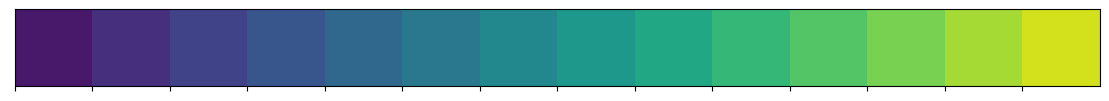

In [43]:
# Define the custom color palette
custom_palette = sns.color_palette("viridis", 14)
sns.palplot(custom_palette)

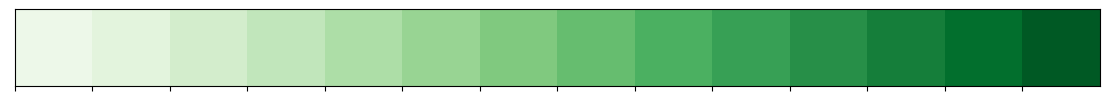

In [44]:
cmap02 = sns.color_palette("Greens", 14)
sns.palplot(cmap02)

In [45]:
ds_S114 = ds_2021[ds_2021["Sensor Number"] == "S114"] #custom_palette[8]
ds_S114_2022 = ds_2022[ds_2022["Sensor Number"] == "S114"] #custom_palette[8]
ds_S112 = ds_2021[ds_2021["Sensor Number"] == "S112"] #custom_palette[5]
ds_S55 = ds_2021[ds_2021["Sensor Number"] == "S55"]  #custom_palette[2]
ds_S56 = ds_2019[ds_2019["Sensor Number"] == "S56"] #custom_palette[0]

In [46]:
ds_matches_2021_S55 = ds_matches_2021[ds_matches_2021["Sensor_Number"] == "S55"]
ds_matches_2021_S112 = ds_matches_2021[ds_matches_2021["Sensor_Number"] == "S112"]
ds_matches_2021_S114 = ds_matches_2021[ds_matches_2021["Sensor_Number"] == "S114"]

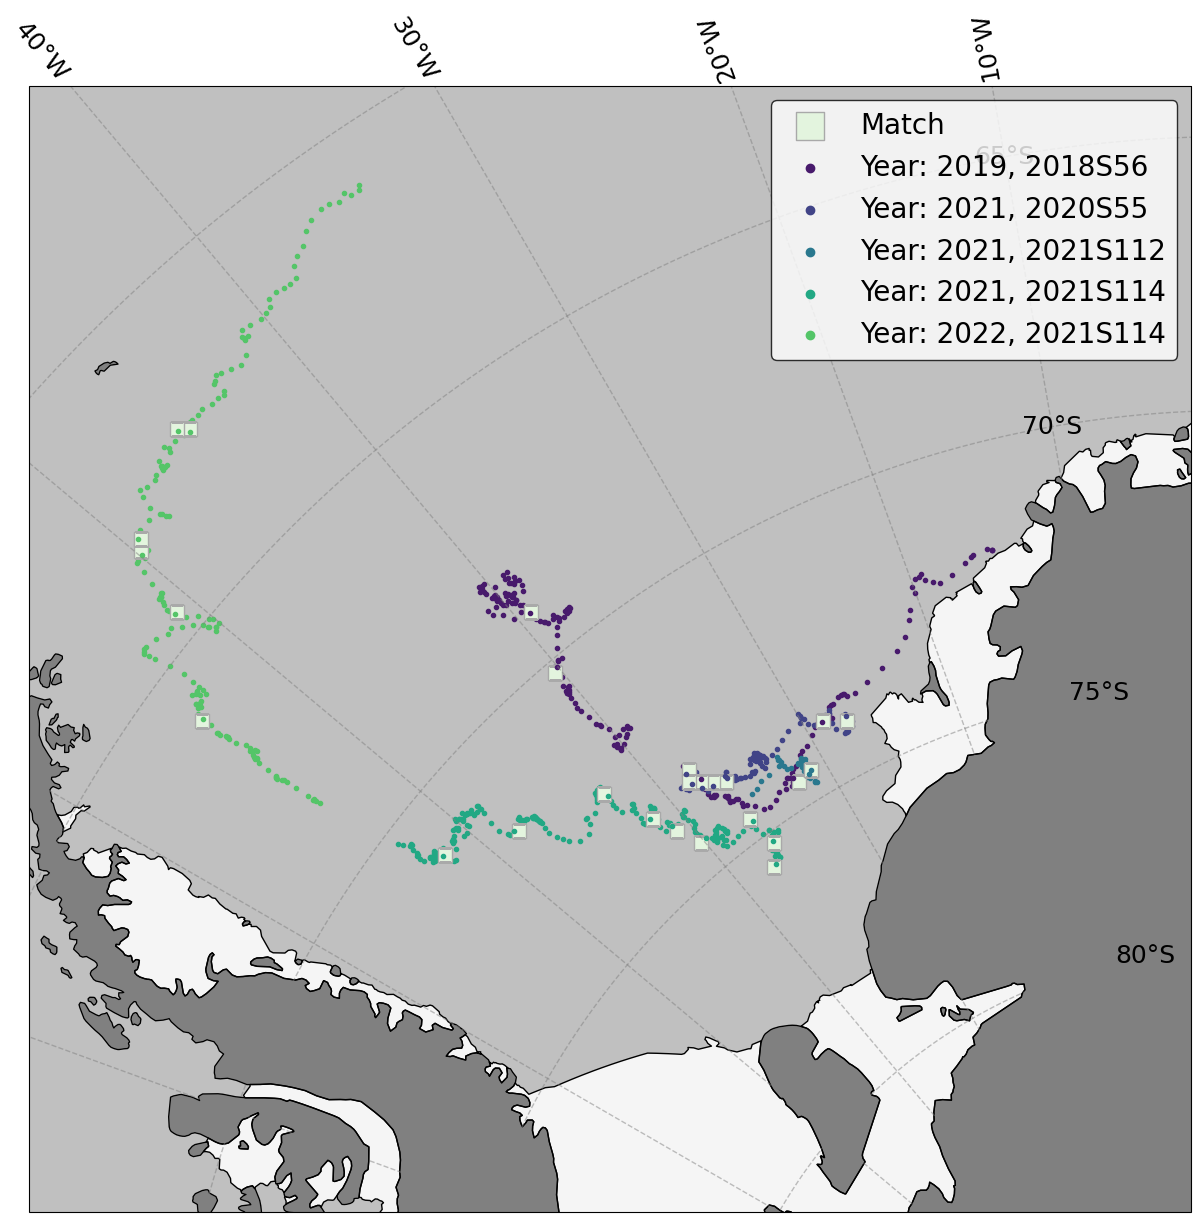

In [47]:
# Define the extent and features
extent = [-60, -5, -80, -64]

fig, ax = plt.subplots(figsize=(15, 15), subplot_kw={"projection": ccrs.SouthPolarStereo()})
ax.set_extent(extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND.with_scale("50m"), facecolor="grey", zorder=0)
ax.add_feature(cfeature.OCEAN, facecolor="silver", zorder=0)
ax.add_feature(Ice_shelves, facecolor="whitesmoke", edgecolor="black", zorder=0)
ax.coastlines()

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="gray", alpha=0.5, linestyle="--")
gl.bottom_labels = False  # Do not show bottom longitude labels
gl.xlabel_style = {"size": 18}
gl.ylabel_style = {"size": 18}

#Snow Buoy trajectories
ax.scatter(ds_S56["Longitude"], ds_S56["Latitude"], color=custom_palette[0], transform=ccrs.PlateCarree(), marker=".")

ax.scatter(ds_S55["Longitude"], ds_S55["Latitude"], color=custom_palette[2], transform=ccrs.PlateCarree(), marker=".")

ax.scatter(ds_S112["Longitude"], ds_S112["Latitude"], color=custom_palette[5], transform=ccrs.PlateCarree(), marker=".")

ax.scatter(ds_S114["Longitude"], ds_S114["Latitude"], color=custom_palette[8], transform=ccrs.PlateCarree(), marker=".")

ax.scatter(ds_S114_2022["Longitude"], ds_S114_2022["Latitude"], color=custom_palette[10], 
           transform=ccrs.PlateCarree(), marker=".")




#Matches
lightest_green = cmap02[1]
x = ds_matches_2019["lon_Kako20"] 
y = ds_matches_2019["lat_Kako20"]
scatters = ax.scatter(x, y, marker="s", s=100, vmin=40, vmax=50, color=lightest_green,
                      edgecolor="darkgrey", linewidth=1, transform=ccrs.PlateCarree())


x = ds_matches_2021["lon_Kako20"] 
y = ds_matches_2021["lat_Kako20"]
scatters = ax.scatter(x, y, marker="s", s=100, vmin=40, vmax=50, color=lightest_green,
                      edgecolor="darkgrey", linewidth=1, transform=ccrs.PlateCarree())


x = ds_matches_2022["lon_Kako20"] 
y = ds_matches_2022["lat_Kako20"]
scatters = ax.scatter(x, y, marker="s", s=100, vmin=40, vmax=50, color=lightest_green,
                      edgecolor="darkgrey", linewidth=1, transform=ccrs.PlateCarree(), label="Match")


#Snow Buoy in match
scatters = ax.scatter(ds_matches_2019["lon_buoy"], ds_matches_2019["lat_buoy"], transform=ccrs.PlateCarree(), 
                       marker=".", color=custom_palette[0], label="Year: 2019, 2018S56")

scatters = ax.scatter(ds_matches_2021_S55["lon_buoy"], ds_matches_2021_S55["lat_buoy"], transform=ccrs.PlateCarree(), 
                       marker=".", color=custom_palette[2], label="Year: 2021, 2020S55")

scatters = ax.scatter(ds_matches_2021_S112["lon_buoy"], ds_matches_2021_S112["lat_buoy"], transform=ccrs.PlateCarree(), 
                       marker=".", color=custom_palette[5], label="Year: 2021, 2021S112")

scatters = ax.scatter(ds_matches_2021_S114["lon_buoy"], ds_matches_2021_S114["lat_buoy"], transform=ccrs.PlateCarree(), 
                       marker=".", color=custom_palette[8], label="Year: 2021, 2021S114")

scatters = ax.scatter(ds_matches_2022["lon_buoy"], ds_matches_2022["lat_buoy"], transform=ccrs.PlateCarree(), 
                       marker=".", color=custom_palette[10], label="Year: 2022, 2021S114")



plt.legend(loc="upper right",edgecolor="black", prop={"size": 20}, markerscale=2)

plt.savefig("Map_of_Matches_trajectories.png", bbox_inches="tight", dpi=300)

plt.show()


